In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
model=LinearRegression()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
data= pd.read_csv('/content/archive (3).zip')
data

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [3]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [4]:
data.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


In [5]:
data.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [6]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

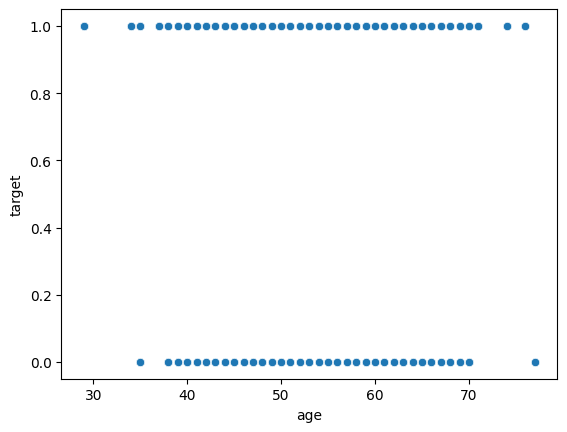

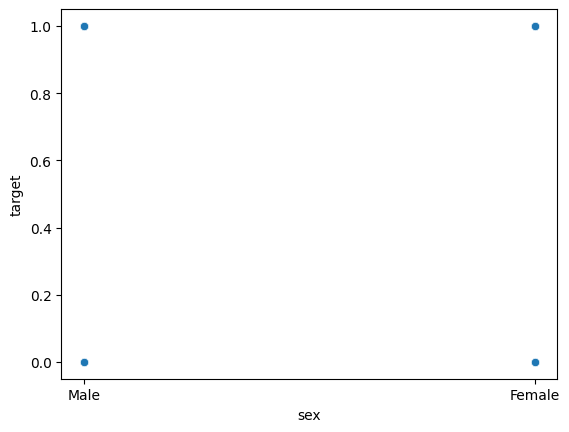

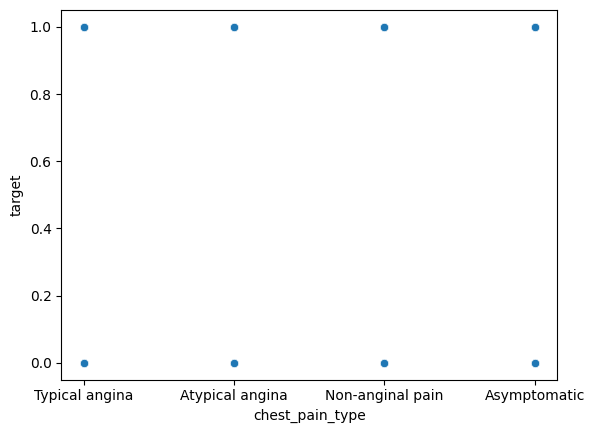

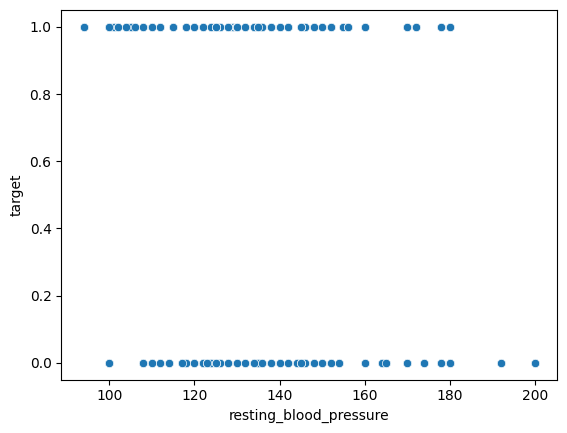

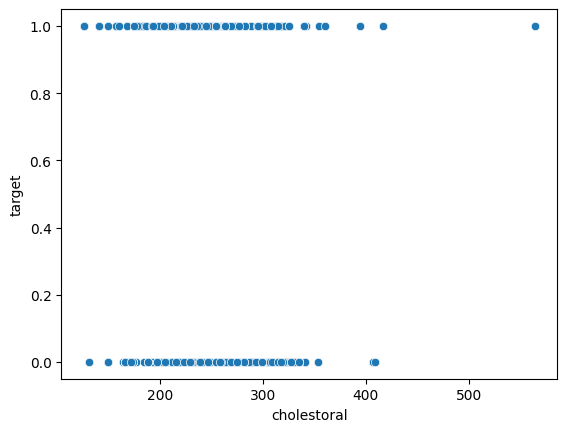

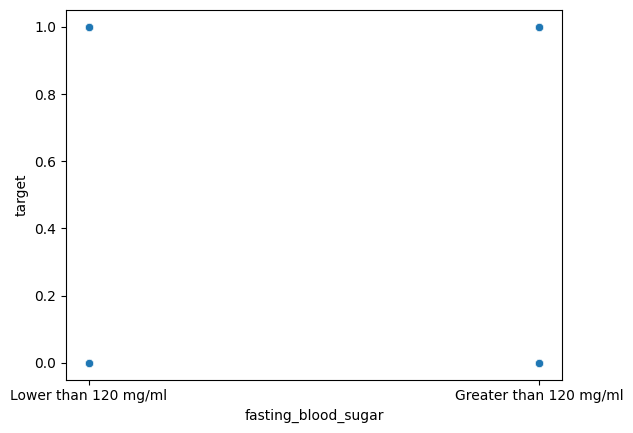

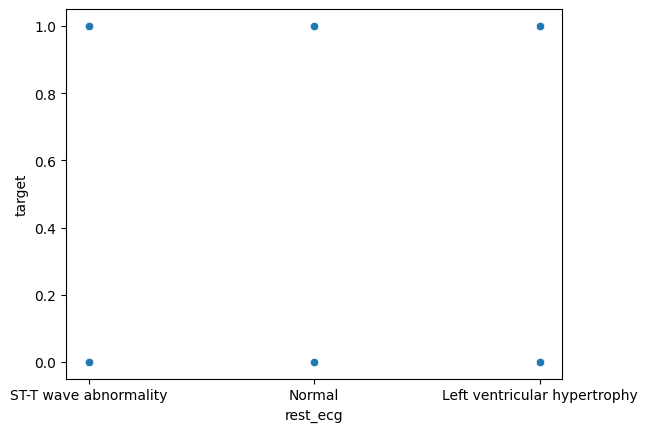

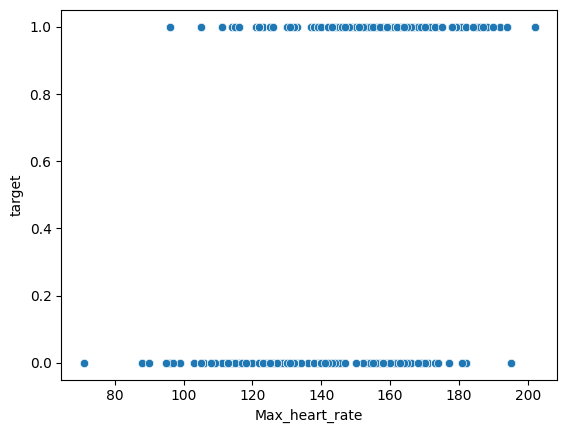

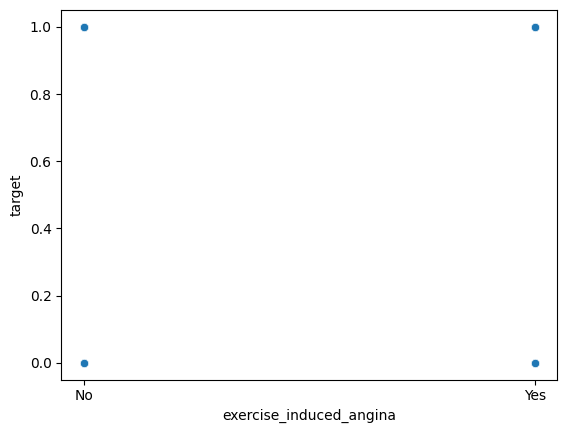

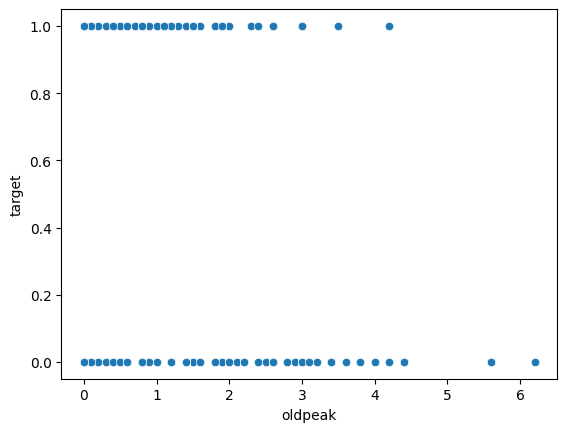

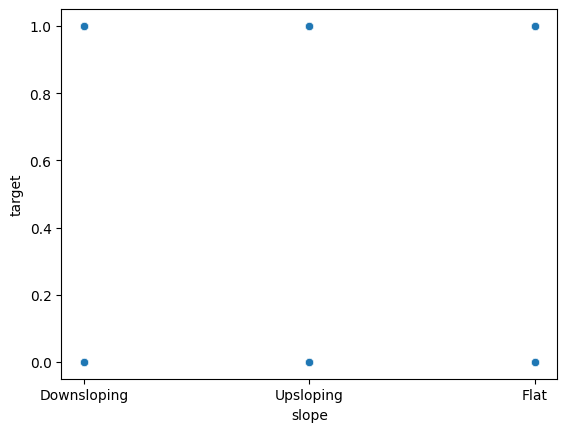

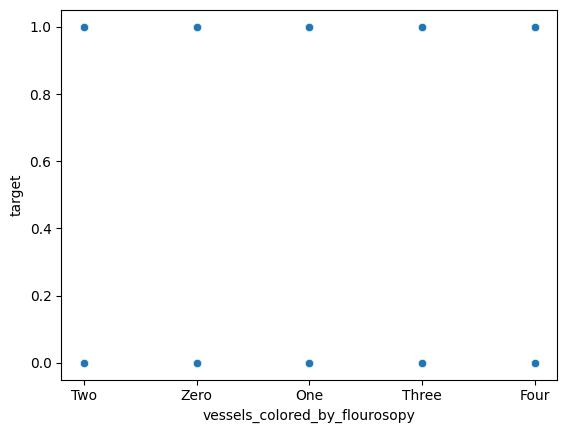

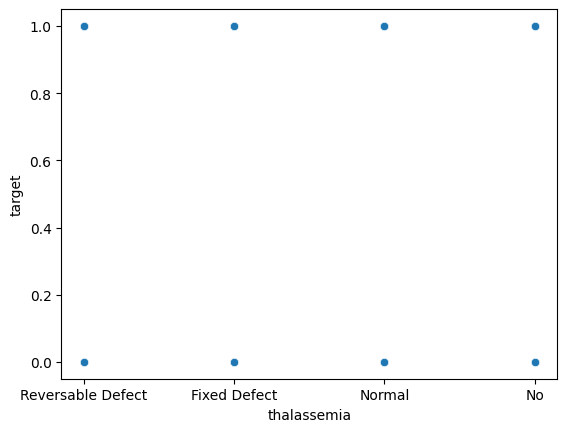

In [7]:
for i in ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia']:
       sns.scatterplot(data=data,x=i,y='target')
       plt.show()

In [8]:
data.nunique()

,0
age,41
sex,2
chest_pain_type,4
resting_blood_pressure,49
cholestoral,152
fasting_blood_sugar,2
rest_ecg,3
Max_heart_rate,91
exercise_induced_angina,2
oldpeak,40


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [10]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
data['chest_pain_type'].unique()

array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

In [12]:
data['fasting_blood_sugar'].unique()

array(['Lower than 120 mg/ml', 'Greater than 120 mg/ml'], dtype=object)

In [13]:
data['rest_ecg'].unique()

array(['ST-T wave abnormality', 'Normal', 'Left ventricular hypertrophy'],
      dtype=object)

In [14]:
data['exercise_induced_angina'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
data['slope'].unique()

array(['Downsloping', 'Upsloping', 'Flat'], dtype=object)

In [16]:
data['vessels_colored_by_flourosopy'].unique()

array(['Two', 'Zero', 'One', 'Three', 'Four'], dtype=object)

In [17]:
data['thalassemia'].unique()

array(['Reversable Defect', 'Fixed Defect', 'Normal', 'No'], dtype=object)

In [18]:
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {data[col].unique()}")


sex: ['Male' 'Female']
chest_pain_type: ['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
fasting_blood_sugar: ['Lower than 120 mg/ml' 'Greater than 120 mg/ml']
rest_ecg: ['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']
exercise_induced_angina: ['No' 'Yes']
slope: ['Downsloping' 'Upsloping' 'Flat']
vessels_colored_by_flourosopy: ['Two' 'Zero' 'One' 'Three' 'Four']
thalassemia: ['Reversable Defect' 'Fixed Defect' 'Normal' 'No']


In [21]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0})

data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map({
    'Lower than 120 mg/ml': 0,
    'Greater than 120 mg/ml': 1
})

data['exercise_induced_angina'] = data['exercise_induced_angina'].map({'No': 0, 'Yes': 1})

# Use Label Encoding for multi-category strings
from sklearn.preprocessing import LabelEncoder
for col in ['chest_pain_type', 'rest_ecg', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']:
    data[col] = LabelEncoder().fit_transform(data[col])


In [23]:
from sklearn.preprocessing import LabelEncoder
for col in ['sex','oldpeak' ]:
    data[col] = LabelEncoder().fit_transform(data[col])

In [24]:
print(data.dtypes)


age                              int64
sex                              int64
chest_pain_type                  int64
resting_blood_pressure           int64
cholestoral                      int64
fasting_blood_sugar              int64
rest_ecg                         int64
Max_heart_rate                   int64
exercise_induced_angina          int64
oldpeak                          int64
slope                            int64
vessels_colored_by_flourosopy    int64
thalassemia                      int64
target                           int64
dtype: object


In [27]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [25]:
X=data.iloc[:,0:13]

In [26]:
y=data.iloc[:,0:13]

In [28]:
X=pd.DataFrame(X,columns=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia'])
y=data['target']

In [29]:
X

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,0,3,125,212,0,2,168,0,10,0,3,3
1,53,0,3,140,203,1,1,155,1,29,2,4,3
2,70,0,3,145,174,0,2,125,1,25,2,4,3
3,61,0,3,148,203,0,2,161,0,0,0,1,3
4,62,0,3,138,294,1,2,106,0,18,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,0,1,140,221,0,2,164,1,0,0,4,0
1021,60,0,3,125,258,0,1,141,1,26,1,1,3
1022,47,0,3,110,275,0,1,118,1,10,1,1,0
1023,50,0,3,110,254,0,1,159,0,0,0,4,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [31]:
X_test

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
621,48,0,3,130,256,1,1,150,1,0,0,3,3
77,63,0,3,140,187,0,1,144,1,35,0,3,3
908,62,0,3,120,267,0,2,99,1,17,1,3,3
483,35,0,1,122,192,0,2,174,0,0,0,4,0
744,60,0,2,102,318,0,2,160,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,57,0,3,120,354,0,2,163,1,6,0,4,0
648,71,0,3,112,149,0,2,125,0,16,1,4,0
470,60,0,0,150,240,0,2,171,0,9,0,4,0
590,74,0,1,120,269,0,1,121,1,2,0,1,0


In [32]:
X_train

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
486,41,0,3,110,172,0,1,158,0,0,0,4,3
936,43,0,2,130,315,0,2,162,0,18,0,1,0
866,41,0,2,112,250,0,2,179,0,0,0,4,0
1004,51,0,2,140,308,0,1,142,0,15,0,1,0
741,41,0,2,112,268,0,1,172,1,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,65,0,3,135,254,0,1,127,0,26,1,1,3
171,56,0,3,130,283,1,1,103,1,16,2,4,3
760,57,0,3,150,276,0,1,112,1,6,1,1,2
904,55,0,1,130,262,0,2,155,0,0,0,4,0


In [33]:
model=LogisticRegression()
model.fit(X_test, y_test)

LogisticRegression()

In [34]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1])

In [35]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 0.8439024390243902


In [36]:
model.score(X_test,y_test)

0.8439024390243902

In [37]:
model.predict_proba(X_test)

array([[7.10672626e-01, 2.89327374e-01],
       [9.95854697e-01, 4.14530298e-03],
       [9.70211128e-01, 2.97888718e-02],
       [1.48608852e-02, 9.85139115e-01],
       [1.83535536e-01, 8.16464464e-01],
       [9.94310233e-01, 5.68976665e-03],
       [9.08158634e-01, 9.18413660e-02],
       [2.20094434e-01, 7.79905566e-01],
       [4.45033590e-01, 5.54966410e-01],
       [9.82381261e-01, 1.76187393e-02],
       [6.18165494e-01, 3.81834506e-01],
       [9.87202618e-01, 1.27973818e-02],
       [1.24868651e-01, 8.75131349e-01],
       [4.39368975e-02, 9.56063102e-01],
       [2.88400132e-01, 7.11599868e-01],
       [3.85545530e-01, 6.14454470e-01],
       [2.88845432e-01, 7.11154568e-01],
       [9.52659057e-01, 4.73409432e-02],
       [9.52659057e-01, 4.73409432e-02],
       [4.63832337e-01, 5.36167663e-01],
       [1.20662778e-02, 9.87933722e-01],
       [5.75513472e-02, 9.42448653e-01],
       [2.35378055e-02, 9.76462195e-01],
       [1.10330277e-01, 8.89669723e-01],
       [1.733277

In [39]:
confusion_matrix(y_test,model.predict(X_test))

array([[77, 23],
       [ 9, 96]])

<function matplotlib.pyplot.show(close=None, block=None)>

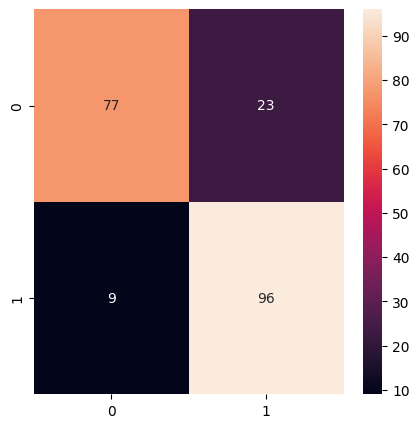

In [40]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True)
plt.show

In [41]:
model.predict

<bound method LinearClassifierMixin.predict of LogisticRegression()>

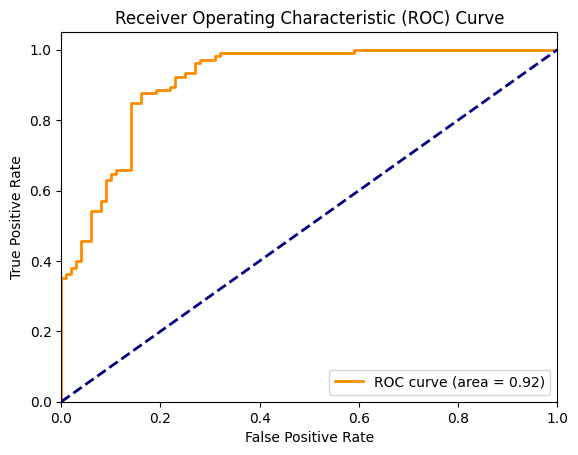

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



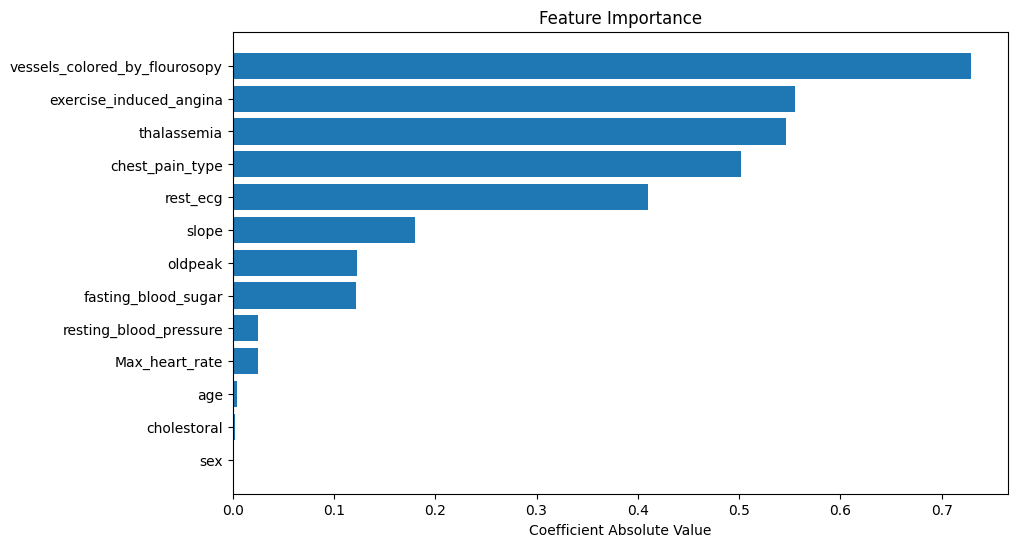

In [43]:
try:
    feature_importance = abs(model.coef_[0])
    feature_names = X_test.columns
    sorted_idx = np.argsort(feature_importance)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.title('Feature Importance')
    plt.xlabel('Coefficient Absolute Value')
    plt.show()
except AttributeError:
    print("Feature importance visualization not available for this model type.")

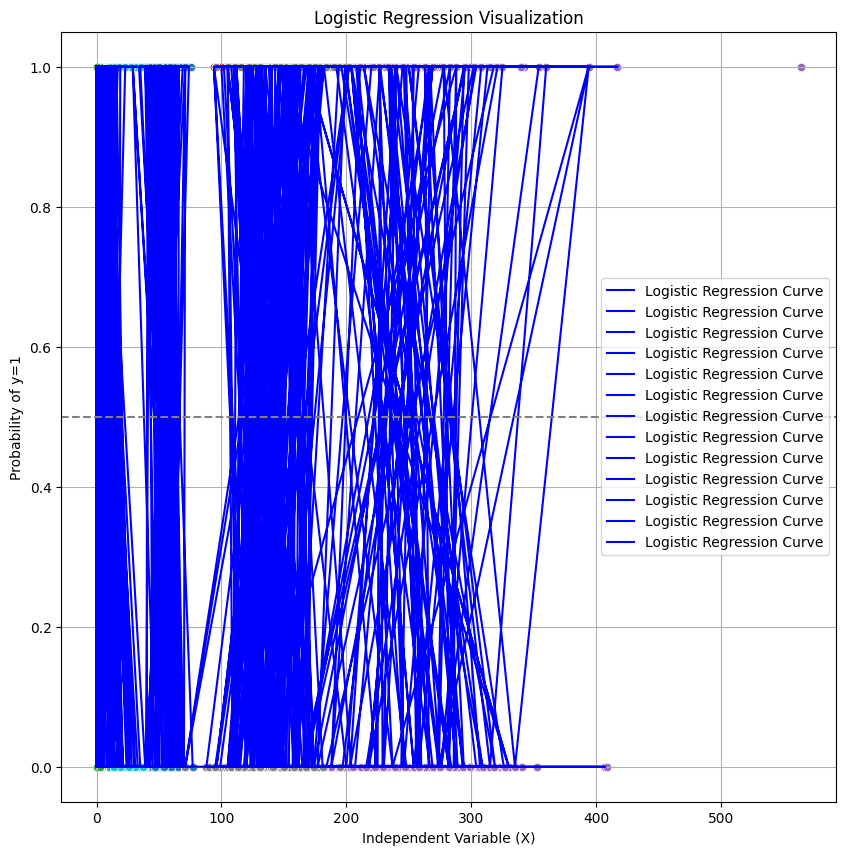

In [38]:
plt.figure(figsize=(10, 10))
#plt.scatter(data.data, color='blue', label='Data_points')
for i in ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia']:
       sns.scatterplot(data=data,x=i,y='target')
plt.plot(X_test, y_test, color='blue', label='Logistic Regression Curve')
plt.title('Logistic Regression Visualization')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Probability of y=1')
plt.axhline(0.5, color='gray', linestyle='--')  # Threshold line
plt.legend()
plt.grid()
plt.show()